# Chennai House Price Predictor 
                                                     Project by: Bagwe Sarvesh  

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


#Dataset Source: https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india?select=Chennai.csv

In [2]:
df=pd.read_csv("Chennai.csv")
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


# Data Cleaning 

In [3]:
df['Location'].value_counts()

Medavakkam         230
Ambattur           195
Sholinganallur     177
Karapakkam         161
Iyappanthangal     158
                  ... 
Ponniammanmedu       1
Abiramapuram         1
Irandankattalai      1
Ottiyambakkam        1
CIT Nagar            1
Name: Location, Length: 185, dtype: int64

### Removing those rows whose value count is 1 

In [4]:
list1=df['Location'].value_counts().index.tolist()
print(list1)

['Medavakkam', 'Ambattur', 'Sholinganallur', 'Karapakkam', 'Iyappanthangal', 'Nanmangalam', 'Avadi', 'Navallur', 'Mogappair', 'Selaiyur', 'Perumbakkam', 'Thoraipakkam OMR', 'Madipakkam', 'Pammal', 'Vadapalani', 'Pallikaranai', 'Porur', 'Kovilambakkam', 'Kovur', 'Anna Nagar', 'Madambakkam', 'Korattur', 'Padur', 'Poonamallee', 'Kolapakkam', 'Kelambakkam', 'Velachery', 'Thiruvanmiyur', 'Ayanambakkam', 'Thiruverkadu', 'Chromepet', 'Perungalathur', 'tambaram west', 'Kilkattalai', 'Moolacheri', 'Pallavaram', 'Mugalivakkam', 'Kolathur', 'Nungambakkam', 'Thalambur', 'Sunnambu Kolathur S Kolathur', 'Guduvancheri', 'Perungudi', 'Manapakkam', 'Maduravoyal', 'Raja Annamalai Puram', 'Adyar', 'Egmore', 'Iyyappanthangal', 'Pozhichalur', 'Sembakkam', 'Vengaivasal', 'Sithalapakkam', 'Manikandan Nagar', 'Kanathur Reddikuppam', 'Alwarpet', 'Kundrathur', 'Rajakilpakkam', 'Vandalur', 'T Nagar', 'Ullagaram', 'Kattupakkam', 'Choolaimedu', 'Velappanchavadi', 'Mevalurkuppam', 'Valasaravakkam', 'East Tambaram',

In [5]:
sum(df.Location.value_counts() ==1)

30

In [6]:
len(list1)
list2=[]
for i in range(154,185):
    list2.append(list1[i])
list2

['Ekkatuthangal',
 'Anna Nagar East',
 'tambaram east',
 '200 Feet Radial Road',
 'Pudupakkam',
 'Thirumudivakkam',
 'Serapanacheri',
 'Injambakkam',
 'Tharapakkam',
 'Annanagar',
 'Chikkarayapuram',
 'Keelma Nagar',
 'Ashok Nagar',
 'Royapuram',
 'Mangadu',
 'Purasaiwakkam',
 'Thiruneermalai',
 'Nandanam',
 'Ayanavaram',
 'Nenmeli',
 'Shanthi Nagar',
 'Manali',
 'Pallikaranai VGP Shanti Nagar',
 'Shenoy Nagar',
 'GST Road',
 'Egattur',
 'Ponniammanmedu',
 'Abiramapuram',
 'Irandankattalai',
 'Ottiyambakkam',
 'CIT Nagar']

In [7]:
for x in list2:
    
    df.drop(df[df['Location'] == x].index, inplace = True)

In [8]:
sum(df.Location.value_counts() ==1)

0

In [9]:
df.isnull().sum().any()

False

In [10]:
df['No. of Bedrooms'].value_counts()

2    2647
3    1701
1     392
4     227
5      15
Name: No. of Bedrooms, dtype: int64

In [11]:
 df.drop(df[df['No. of Bedrooms'] == 5].index, inplace = True)

In [12]:
df['BED'].value_counts() #9 here shows that the value is not available for this critera

9    2746
0    2183
1      38
Name: BED, dtype: int64

In [13]:
df.drop('BED',
  axis='columns', inplace=True)

In [14]:
corr_matrix = df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.405363
No. of Bedrooms        0.295056
Resale                 0.089083
Gymnasium              0.063072
SwimmingPool           0.061923
PowerBackup            0.060186
LandscapedGardens      0.059439
ClubHouse              0.059007
Children'splayarea     0.058805
Intercom               0.058607
24X7Security           0.056701
IndoorGames            0.055113
SportsFacility         0.054871
CarParking             0.054158
LiftAvailable          0.053918
RainWaterHarvesting    0.052972
Gasconnection          0.052908
JoggingTrack           0.052676
VaastuCompliant        0.052655
MultipurposeRoom       0.052188
Cafeteria              0.051930
Sofa                   0.051719
WashingMachine         0.051512
DiningTable            0.051221
Microwave              0.051197
AC                     0.051169
ShoppingMall           0.050798
StaffQuarter           0.050711
Refrigerator           0.050600
TV                     0.050449
Maintena

### Droping these columns because of lower correlation value

In [15]:
df.drop(['VaastuCompliant','MultipurposeRoom','Cafeteria','Sofa','WashingMachine','DiningTable','Microwave','AC','ShoppingMall','StaffQuarter','Refrigerator','TV','MaintenanceStaff','Hospital','School','Wifi','GolfCourse',           
'Wardrobe','ATM'],axis=1, inplace=True)

In [16]:
df['Gymnasium'].value_counts()

9    2746
0    1115
1    1106
Name: Gymnasium, dtype: int64

In [17]:
df['SwimmingPool'].value_counts()

9    2746
0    1379
1     842
Name: SwimmingPool, dtype: int64

In [18]:
df["JoggingTrack"].value_counts()

9    2746
0    1567
1     654
Name: JoggingTrack, dtype: int64

### We have to drop columns because the 50% of data in that columns were empty and they are not having high correlation value 

In [19]:
df.drop(['JoggingTrack','SwimmingPool','PowerBackup','Gymnasium','LandscapedGardens','ClubHouse',"Children'splayarea",'Intercom','24X7Security','IndoorGames','SportsFacility','CarParking','LiftAvailable','RainWaterHarvesting','Gasconnection' ],axis=1,inplace=True)

In [20]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale
0,5500000,1310,Perungalathur,3,0
1,5350000,1126,Madhavaram,2,0
2,8205000,1307,Karapakkam,3,0
3,23400000,3600,Thiruvidandhai,3,0
4,10100000,1700,Iyappanthangal,3,0


# Data Visualization

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='count'>

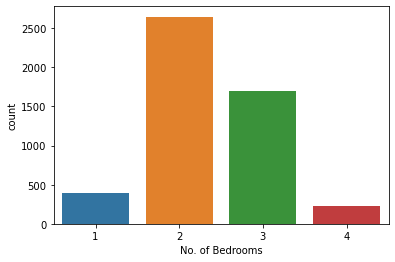

In [21]:
sns.countplot(data=df,x="No. of Bedrooms")

In [22]:
numerical_data=['Price','Area','No. of Bedrooms','Resale']
categorical_data=['Location']


<AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>

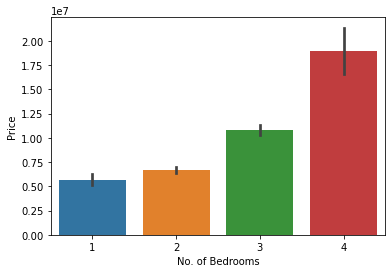

In [23]:
sns.barplot(x=df["No. of Bedrooms"],y=df["Price"])

<Figure size 1080x1080 with 0 Axes>

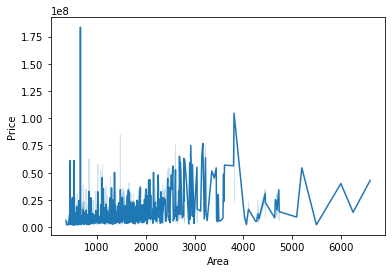

<Figure size 1080x1080 with 0 Axes>

In [24]:
sns.lineplot(x=df["Area"],y=df["Price"])
plt.figure(figsize=(15,15))

<AxesSubplot:xlabel='Resale', ylabel='Price'>

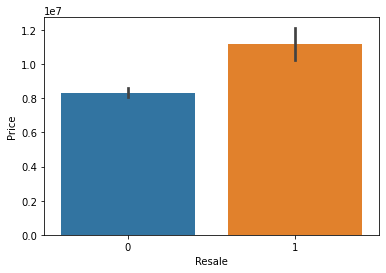

In [25]:
sns.barplot(x=df["Resale"],y=df["Price"])

<AxesSubplot:xlabel='Resale', ylabel='count'>

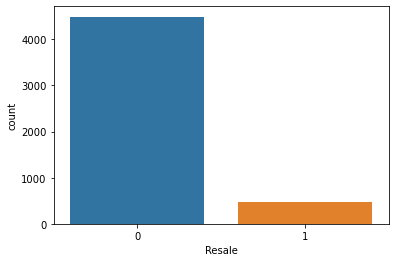

In [26]:
sns.countplot(data=df,x="Resale")

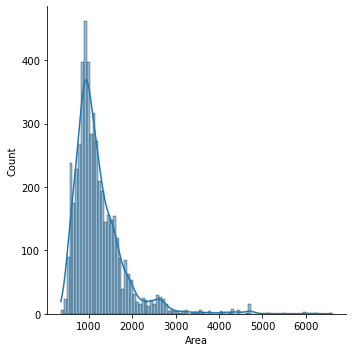

In [27]:
sns.displot(data=df,x='Area',kde=True)

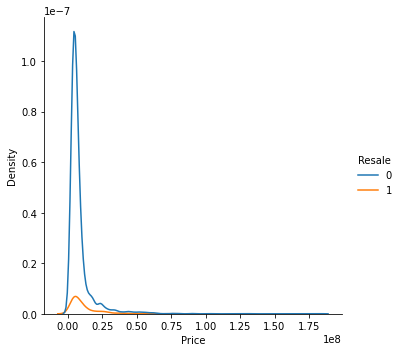

In [28]:
sns.displot(data=df,x="Price",hue="Resale",kind="kde")

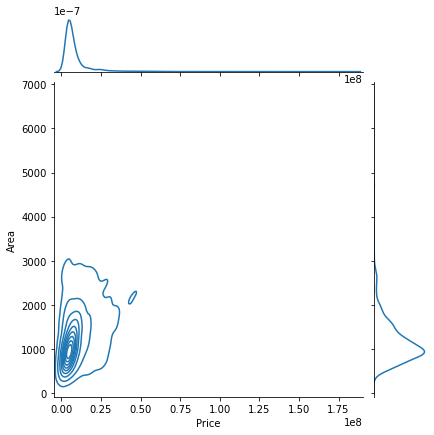

In [29]:
sns.jointplot(y=df['Area'],x=df["Price"],kind="kde")

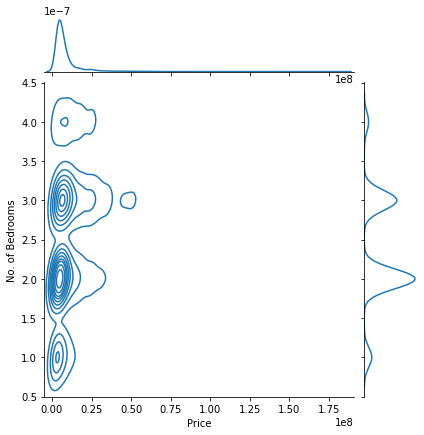

In [30]:
sns.jointplot(y=df['No. of Bedrooms'],x=df["Price"],kind="kde")

### From the analysis we can say that:
#### Price of houses which have 1 or 2 Bedrooms differs in less amount

#### There is a gradual noticible change(exponential change) in price of houses having 2,3 or 4 Bedrooms

#### There is a spike in price even though the area of the house is less because of posh location

#### The price of house depends on area and location of house 


## Ordinal Coding for Categorical Values

In [31]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Location_code"] = ord_enc.fit_transform(df[["Location"]])
df[["Location", "Location_code"]].head(11)

,Location,Location_code
0,Perungalathur,97.0
1,Madhavaram,60.0
2,Karapakkam,40.0
3,Thiruvidandhai,130.0
4,Iyappanthangal,35.0
5,Mevalurkuppam,71.0
6,Kolapakkam,48.0
7,Kundrathur,57.0
8,Pammal,91.0
9,Puzhal,104.0


In [32]:
New_data=df.copy()
df.to_csv("New")

In [33]:
New_data.head()

,Price,Area,Location,No. of Bedrooms,Resale,Location_code
0,5500000,1310,Perungalathur,3,0,97.0
1,5350000,1126,Madhavaram,2,0,60.0
2,8205000,1307,Karapakkam,3,0,40.0
3,23400000,3600,Thiruvidandhai,3,0,130.0
4,10100000,1700,Iyappanthangal,3,0,35.0


In [34]:
New_data.drop("Location",axis="columns",inplace=True)


### Train set - Test set splitting

In [35]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(New_data, test_size=0.2, random_state=42)
train_set

,Price,Area,No. of Bedrooms,Resale,Location_code
2431,5737000,927,2,0,6.0
2229,26600000,1540,3,0,10.0
2428,20000000,1215,3,0,10.0
80,9086000,1298,3,0,143.0
806,2850000,750,1,0,76.0
...,...,...,...,...,...
4463,15500000,1479,3,0,139.0
469,2675000,677,2,0,14.0
3111,6096000,881,2,0,111.0
3802,5965000,721,2,0,6.0


In [36]:
y_train=train_set.Price
y_test=test_set.Price

In [37]:
train_set.drop("Price",axis=1)
test_set.drop("Price",axis=1)
X_train=train_set
X_test=test_set



In [38]:
X_train

,Price,Area,No. of Bedrooms,Resale,Location_code
2431,5737000,927,2,0,6.0
2229,26600000,1540,3,0,10.0
2428,20000000,1215,3,0,10.0
80,9086000,1298,3,0,143.0
806,2850000,750,1,0,76.0
...,...,...,...,...,...
4463,15500000,1479,3,0,139.0
469,2675000,677,2,0,14.0
3111,6096000,881,2,0,111.0
3802,5965000,721,2,0,6.0


# Model Training

### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
my_model= RandomForestRegressor(n_estimators=350)
my_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=350)

##### Prediction and Testing on Test set

In [40]:
predict=my_model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predict,y_test)

108636.02589824659

#### Prediction and Testing on Training set

In [42]:
predict1=my_model.predict(X_train)

In [43]:
mean_absolute_error(predict1,y_train)

8815.389838553094